# Accuracy Testing of Python port compared to MATLAB original

In [ ]:
from anymatrix import Anymatrix
from tabulate import tabulate
import matlab.engine
import itertools
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

am = Anymatrix()
eng = matlab.engine.start_matlab()
eng.cd(r"C:\Users\propo\OneDrive - University of Leeds\Documents\MATLAB\anymatrix", nargout=1)

# MATLAB/Pascal
## Difference in L2 norm

In [16]:
am.anymatrix("matlab/pascal", 4)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  3.,  6., 10.],
       [ 1.,  4., 10., 20.]])

C:\Users\propo\AppData\Local\Temp\ipykernel_26364\2689973379.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  difference.append(abs((python_l2 - matlab_l2)/matlab_l2))


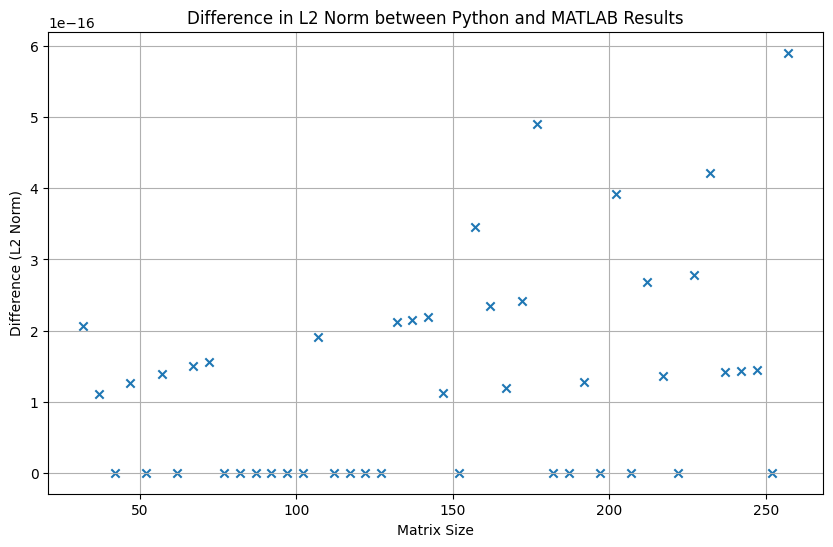

[np.float64(2.0661726224967904e-16), np.float64(1.1124064870333655e-16), np.float64(0.0), np.float64(1.256106149205232e-16), np.float64(0.0), np.float64(1.3849735869339454e-16), np.float64(0.0), np.float64(1.5028300524269463e-16), np.float64(1.558419277520027e-16), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.9025959297210782e-16), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(2.114408962743581e-16), np.float64(2.1542738621021696e-16), np.float64(2.193414333280769e-16), np.float64(1.1159342453830486e-16), np.float64(0.0), np.float64(3.460281818846162e-16), np.float64(2.343447954613845e-16), np.float64(1.1897393315337342e-16), np.float64(2.414971857896112e-16), np.float64(4.899901802071389e-16), np.float64(0.0), np.float64(0.0), np.float64(1.2760064973205407e-16), np.float64(0.0), np.float64(3.926767041428766e-16), np.float64(0.0), np.float64(2.682061018031679e-16), np.float64(1.356799

In [4]:
matrix_ID = ["matlab/pascal"]
matrix_size = list(range(32,500, 5))
comb = list(itertools.product(matrix_ID, matrix_size))
difference = []
for args in comb:
    python_result = am.anymatrix(args[0], args[1])
    matlab_result = eng.anymatrix(args[0], float(args[1]))

    converted = np.array(matlab_result)
    
    # calculate the L2 norm of both matrices
    python_l2 = np.linalg.norm(python_result)
    matlab_l2 = np.linalg.norm(converted)
    difference.append(abs((python_l2 - matlab_l2)/matlab_l2))
    

plt.figure(figsize=(10, 6))
plt.scatter(matrix_size, difference[:len(matrix_size)], marker='x')
plt.xlabel('Matrix Size')
plt.ylabel('Difference (L2 Norm)')
plt.title('Difference in L2 Norm between Python and MATLAB Results')
plt.grid(True)
plt.show()
print(difference)


In [ ]:
true = 1441110
aprox = 1441111
error = abs((true - aprox)/true)
print(error)

6.939095558284933e-07


: 

## Difference in L2 Norm compaired to original L2 Norm


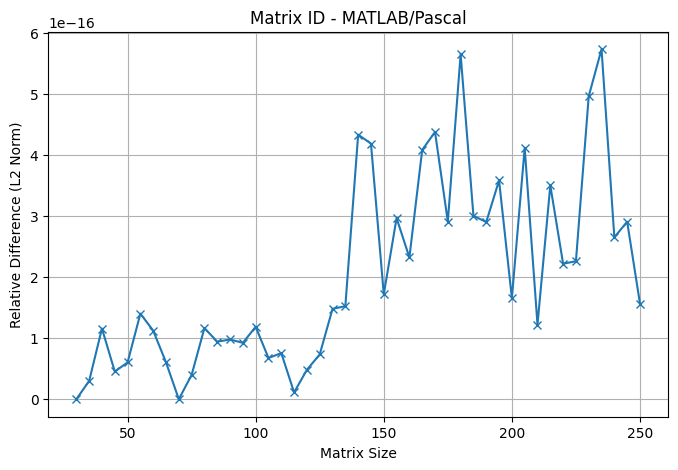

In [33]:
matrix_ID = ["matlab/pascal"]
matrix_size = list(range(30,251, 5))
comb = list(itertools.product(matrix_ID, matrix_size))
difference = []
for args in comb:
    python_result = am.anymatrix(args[0], args[1])
    matlab_result = eng.anymatrix(args[0], float(args[1]))

    converted = np.array(matlab_result)
    
    # calculate the L2 norm of both matrices
    matlab_l2 = np.linalg.norm(converted)
    difference.append(abs(np.linalg.norm(python_result - converted)/np.linalg.norm(matlab_l2)))
    

plt.figure(figsize=(8, 5))
plt.plot(matrix_size, difference, marker='x')
plt.xlabel('Matrix Size')
plt.ylabel('Relative Difference (L2 Norm)')
plt.title('Matrix ID - MATLAB/Pascal')
plt.grid(True)
# plt.yscale('log')
plt.show()


In [28]:
matrix_ID = ["matlab/pascal"]
matrix_size = [300]
comb = list(itertools.product(matrix_ID, matrix_size))
difference = []
for args in comb:
    python_result = am.anymatrix(args[0], args[1])
    # python_2 = am.anymatrix(args[0], args[1], 'double')
    matlab_result = eng.anymatrix(args[0], float(args[1]))

    converted = np.array(matlab_result)
    
    python_l2 = np.linalg.norm(python_result)
    # temp = np.linalg.norm(python_2)
    # print(np.array_equal(python_result, python_2))
    matlab_l2 = np.linalg.norm(converted)
    # print(python_l2, temp)
    result = np.array_equal(python_result, converted)
    if result == False:
        for i in range(len(python_result)):
            for j in range(len(python_result[i])):
                if python_result[i][j] != converted[i][j]:
                    # print(i, j, python_result[i][j], converted[i][j])
                    pass
    print(result)
    print(python_l2, matlab_l2)
    print(np.linalg.norm(python_result - converted))


False
inf inf
inf


In [28]:
print(am.anymatrix("matlab/pascal", 4, classname='double'))
print(am.anymatrix("matlab/pascal", 4))

TypeError: Anymatrix.anymatrix() got an unexpected keyword argument 'classname'